# Rod cutting problem

In [1]:
from collections import defaultdict

In [31]:
from functools import lru_cache

In [32]:
prices=defaultdict(lambda: -float('inf'))

In [33]:
prices[0]

-inf

In [34]:
len(prices)

1

<center>
<img src="RodCut.png" width="50%" height="50%"></img>
</center>

In [35]:
for i, v in enumerate([1,5,8,9,10,17,17,20,24,30]):
    prices[i+1]=v

In [100]:
@memo
def reve(r):
    return max([prices[r]]+[(prices[i]+reve(r-i)) for i in range(1,r)])

In [92]:
@memo
def cut_rod(p,n):
    if n==0:return 0
    q=-float('inf')
    for i in range(1,(n+1)):
        q=max(q,p[i]+cut_rod(p,n-i))
    return q

In [94]:
cut_rod(prices,20)

60

In [62]:
@lru_cache()
def test(r):
    return max([prices[r]]+[(test(i)+test(r-i)) for i in range(1,r//2+1)])

In [99]:
test(109)

325

In [102]:
reve(109)

325

In [65]:
import time
def runtime(func,times=1):
    start=time.time()
    for _ in range(times):
        func
    print("{} cost for running {}".format(time.time()-start,times))

In [66]:
runtime(cut_rod(prices,20),100)

2.1457672119140625e-06 cost for running 100


In [72]:
runtime(test(20),100)

4.291534423828125e-06 cost for running 100


In [111]:
runtime(reve(20),50)

4.0531158447265625e-06 cost for running 50


<img src='Rod1.png' width='40%' height='40%'></img>
<img src="Rod2.png" width='50%' height='50%'></img>



In [109]:
import numpy as np
def M_cut_Rod(p,n):
    r=np.zeros(n+1)
    for i in range(n+1):
        r[i]=-float('inf')
    return M_cut_Rod_Aux(p,n,r)
    
def M_cut_Rod_Aux(p,n,r):
    if r[n]>=0:return r[n]
    if n==0: 
        q=0
    else:
        q=-float('inf')
        for i in range(1,n+1):
            q=max(q,p[i]+M_cut_Rod_Aux(p,n-i,r))
    r[n]=q
    return q
        

In [110]:
M_cut_Rod(prices,109)

325.0

<img src=Rod3.png height=350% width=35%></img>

In [113]:
def Bu_Cut_Rod(p, n):
    r=np.zeros(n+1)
    for j in range(1,n+1):
        q=-float('inf')
        for i in range(1,j+1):
            q=max(q,p[i]+r[j-i])
        r[j]=q
    return r[n]

In [116]:
Bu_Cut_Rod(prices,109)

325.0

In [9]:
import time
start=time.time()
reve(20)
print("time cost of this function is:{0}".format(time.time()-start))

time cost of this function is:0.3502330780029297


In [10]:
@lru_cache()
def reve(r):
    return max([prices[r]]+[(prices[i]+reve(r-i)) for i in range(1,r)])

In [11]:
start=time.time()
reve(20)
print("time cost of this function after cache added is:{}".format(time.time()-start))

time cost of this function after cache added is:9.608268737792969e-05


In [12]:
help(lru_cache)

Help on function lru_cache in module functools:

lru_cache(maxsize=128, typed=False)
    Least-recently-used cache decorator.
    
    If *maxsize* is set to None, the LRU features are disabled and the cache
    can grow without bound.
    
    If *typed* is True, arguments of different types will be cached separately.
    For example, f(3.0) and f(3) will be treated as distinct calls with
    distinct results.
    
    Arguments to the cached function must be hashable.
    
    View the cache statistics named tuple (hits, misses, maxsize, currsize)
    with f.cache_info().  Clear the cache and statistics with f.cache_clear().
    Access the underlying function with f.__wrapped__.
    
    See:  http://en.wikipedia.org/wiki/Cache_algorithms#Least_Recently_Used



In [13]:
cached={}

def revenu(r):
    if r in cached:
        #print("I am in cached {}".format(r))
        return cached[r]
    opt=max([prices[r]]+[(prices[i]+revenu(r-i)) for i in range(1,r)])
    if opt not in cached:
        cached[r]=opt
    return opt

In [14]:
Cached={}

def Revenu(r):
    if r in Cached:
        #print("I am in cached {}".format(r))
        return Cached[r]
    opt=max([prices[r]]+[(prices[i]+Revenu(r-i)) for i in range(1,r)])
    Cached[r]=opt
    return opt

In [15]:
def print_hi(func):
    def _wrap(*args, **kwargs):
        print("I am in function {}".format(func.__name__))
        return func(*args, **kwargs)
    return _wrap

In [16]:
def add(a,b):return a+b

In [17]:
add(19,1)

20

In [18]:
@print_hi
def add(a,b):return a+b

In [19]:
add(19,1)

I am in function add


20

In [20]:
p_add=print_hi(add)

In [21]:
p_add(3,4)

I am in function _wrap
I am in function add


7

In [22]:
print_hi(revenu)(44)

I am in function revenu


130

<center> 
    <img src="test_home.JPG" width="100" height="50"></img> 
</center>

In [23]:
import time

def funcRunTime(func, times):
    start=time.time()
    for _ in range(times):
        func
    end=time.time()
    return end-start

In [24]:
funcRunTime(Revenu(105),200000)

0.005015850067138672

In [25]:
funcRunTime(revenu(105),200000)

0.004675149917602539

In [26]:
import random
random_numbers=[(i,random.randint(-10,20)) for i in range(10)]

In [27]:
random_numbers

[(0, 13),
 (1, 13),
 (2, 5),
 (3, 0),
 (4, 5),
 (5, 14),
 (6, -5),
 (7, -2),
 (8, 0),
 (9, -10)]

In [28]:
max(random_numbers,key=lambda x:x[1])

(5, 14)

In [29]:
revenu(100)

300

In [30]:
@lru_cache()
def addsome(somelist):
    return sum(somelist)

In [31]:
addsome([1,2,3,4])

TypeError: unhashable type: 'list'

In [78]:
from functools import wraps

In [79]:
def memo(func):
    cached={}
    @wraps(func)
    def _wrap(*args,**kwargs):
        str_key=str(args)+str(**kwargs)
        if str_key not in cached:
            result=func(*args,**kwargs)
            cached[str_key]=result
        return cached[str_key]
    return _wrap

In [80]:
@memo
def addsome(somelist):
    return sum(somelist)

In [35]:
addsome([1,2,3,4,5,6,6])

27

In [36]:
solution={}
@memo
def revenue(r):
    split, r_opt=max([(0,prices[r])]+[(i,prices[i]+revenue(r-i)) for i in range(1,r)], key=lambda x:x[1])
    solution[r]=(split,r-split)
    return r_opt

In [37]:
revenue(100)

300

In [38]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23),
 26: (6, 20),
 27: (1, 26),
 28: (2, 26),
 29: (3, 26),
 30: (10, 20),
 31: (1, 30),
 32: (2, 30),
 33: (3, 30),
 34: (2, 32),
 35: (2, 33),
 36: (6, 30),
 37: (1, 36),
 38: (2, 36),
 39: (3, 36),
 40: (10, 30),
 41: (1, 40),
 42: (2, 40),
 43: (3, 40),
 44: (2, 42),
 45: (2, 43),
 46: (6, 40),
 47: (1, 46),
 48: (2, 46),
 49: (3, 46),
 50: (10, 40),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (2, 52),
 55: (2, 53),
 56: (6, 50),
 57: (1, 56),
 58: (2, 56),
 59: (3, 56),
 60: (10, 50),
 61: (1, 60),
 62: (2, 60),
 63: (3, 60),
 64: (2, 62),
 65: (2, 63),
 66: (6, 60),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (1, 70),
 72: (2, 70),
 73:

In [39]:
def parse_solution(r,revenue_solution):
    left,right=revenue_solution[r]
    if left==0:return [right]
    return [left]+parse_solution(right,revenue_solution)

In [40]:
def pretty_solution(splits):
    return ' -->'.join(map(str,splits))

In [41]:
pretty_solution(parse_solution(18,solution))

'2 -->6 -->10'

In [42]:
pretty_solution(parse_solution(57,solution))

'1 -->6 -->10 -->10 -->10 -->10 -->10'

In [43]:
help(revenue)

Help on function revenue in module __main__:

revenue(r)



In [44]:
help(add)

Help on function _wrap in module __main__:

_wrap(*args, **kwargs)



In [45]:
start=time.time()
revenue(300)
print('used time:{}'.format(time.time()-start))

used time:0.03411602973937988


# Edit Distance

In [46]:
@memo
def get_ed_dist(string1,string2):
    if len(string1)==0:return len(string2)
    if len(string2)==0:return len(string1)
    
    return min(
        [get_ed_dist(string1[:-1],string2)+1,
         get_ed_dist(string1,string2[:-1])+1,
         get_ed_dist(string1[:-1],string2[:-1])+(0 if string1[-1] == string2[-1] else 2)
        ]
    )

In [47]:
get_ed_dist('biejing','beijing')

2

In [48]:
get_ed_dist('biejing','beijie')

5

In [49]:
get_ed_dist('biejing','beijin')

3

# More about Dynamic Programming
if you want to know more about Dynamic Programming, you may refer the `Introduction to Algorithms` by CLRS
# Optional, Try VRP Problem

In [50]:
import random
import matplotlib.pylab as plt

latitudes=[random.randint(-100,100) for _ in range(20)]
longitude=[random.randint(-100,100) for _ in range(20)]

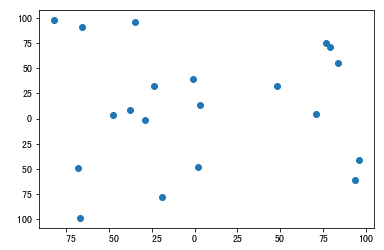

In [51]:
plt.scatter(latitudes,longitude)

# input: the latitudes and longitude of some points, and the number `k` of cars will travel for this. give it pls

# The Knapsack Problem
## 0-1背包问题

In [52]:
import numpy as np

In [53]:
####
'''
1. there are n kinds of items
2. v is a vector of length equal to n+1, v[0]=0, v[i] represent the ith item value(from 1-n)
3. w is a vector of len equal to n+1, w[0]=0, w[i] represent the ith item weight
4. n the number of items
5. W is up limit weight which the bag could handle
'''
####
def KnapSack(v,w,n,W):
    '''
    \t initial a (n+1)*(W+1) matrix
    '''
    V=np.zeros((n+1)*(W+1)).reshape(n+1,W+1)
    for i in range(1,n+1):
        for j in range(W+1):
            ###put the ith item into bag of capacity j
            if j>=w[i]:
                V[i][j]=max(V[i-1][j],v[i]+V[i-1][j-w[i]])
                #print(V)
            ### the ith item is too big to be put in 
            else:
                V[i][j]=V[i-1][j]
                #print(V)
    return V[n][W]
    

In [54]:
import random
# produce n item to test
def produceItem(n):
    v=[0]
    w=[0]
    for _ in range(n):
        v.append(random.randint(10,100))
        w.append(random.randint(1,10))
    return v,w


In [55]:
v,w=produceItem(10)

In [56]:
v

[0, 22, 14, 53, 22, 32, 11, 91, 35, 73, 30]

In [57]:
w

[0, 8, 1, 3, 1, 5, 6, 3, 4, 7, 7]

In [58]:
KnapSack(v,w,10,5)

127.0

In [59]:
v=[0,10,40,30,50]
w=[0,5,4,6,3]

In [60]:
KnapSack(v,w,4,10)

90.0

In [61]:

####
def KNapSack(v,w,n,W):
    '''完整的0-1背包问题
    输入参数：
        v 各种商品的价格
        w 各种商品的体积（重量）
        n 商店里总共有多少种商品
        W 背包的大小（与w单位致）

    v[0]=w[0]=0 用作初始化表
    '''    
    V=np.zeros((n+1)*(W+1)).reshape(n+1,W+1)
    keep=np.zeros((n+1)*(W+1)).reshape(n+1,W+1)
    
    for i in range(1,n+1):
        for j in range(W+1):
            if j>=w[i] and v[i]+V[i-1][j-w[i]]>V[i-1][j]:
                V[i][j]=v[i]+V[i-1][j-w[i]]
                keep[i][j]=1
            else:
                V[i][j]=V[i-1][j]
                keep[i][j]=0
    K=W
    for i in range(n,0,-1):
        if keep[i][K]==1:
            print("{}th item selected, value is:{} weight is:{}".format(i,v[i],w[i]))
            K=K-w[i]
    #print(keep)
    return V[n][W]

In [62]:
help(KNapSack)

Help on function KNapSack in module __main__:

KNapSack(v, w, n, W)
    完整的0-1背包问题
    输入参数：
        v 各种商品的价格
        w 各种商品的体积（重量）
        n 商店里总共有多少种商品
        W 背包的大小（与w单位致）
    
    v[0]=w[0]=0 用作初始化表



In [63]:
v,w=produceItem(10)

In [64]:
v

[0, 90, 21, 80, 67, 16, 46, 72, 36, 30, 69]

In [65]:
w

[0, 8, 3, 4, 10, 4, 1, 3, 10, 5, 2]

In [66]:
KNapSack(v,w,10,10)

10th item selected, value is:69 weight is:2
7th item selected, value is:72 weight is:3
6th item selected, value is:46 weight is:1
3th item selected, value is:80 weight is:4


267.0

In [67]:
KNapSack(v,w,10,200)

10th item selected, value is:69 weight is:2
9th item selected, value is:30 weight is:5
8th item selected, value is:36 weight is:10
7th item selected, value is:72 weight is:3
6th item selected, value is:46 weight is:1
5th item selected, value is:16 weight is:4
4th item selected, value is:67 weight is:10
3th item selected, value is:80 weight is:4
2th item selected, value is:21 weight is:3
1th item selected, value is:90 weight is:8


527.0